In [27]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [2]:
# load dataset
df = pd.read_csv('data_4.csv')
print(df.shape)
df.head()


(28458, 84)


,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,29729182.96,29729182.96,29729182.96,29729182.96,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,29855277.06,29855277.06,29855277.06,29855277.06,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,29842149.02,29842149.02,29842149.02,29842149.02,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,29913774.97,29913774.97,29913774.97,29913774.97,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,29814704.90,29814704.90,29814704.90,29814704.90,0.0,64240,26847,502,MQTT_Publish


# Part 1: Preprocessing and Understanding Dataset

In [3]:
# checking for missing values
df.isnull().sum().sum()

np.int64(0)

In [4]:
# drop duplicates
df.drop_duplicates(inplace=True)
print(df.shape)

(27833, 84)


In [5]:
# data types and info
df.info()
# 81 numeric columns and 3 object columns
# 83 features and 1 target column

<class 'pandas.core.frame.DataFrame'>
Index: 27833 entries, 0 to 28457
Data columns (total 84 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id.orig_p                 27833 non-null  int64  
 1   id.resp_p                 27833 non-null  int64  
 2   proto                     27833 non-null  object 
 3   service                   27833 non-null  object 
 4   flow_duration             27833 non-null  float64
 5   fwd_pkts_tot              27833 non-null  int64  
 6   bwd_pkts_tot              27833 non-null  int64  
 7   fwd_data_pkts_tot         27833 non-null  int64  
 8   bwd_data_pkts_tot         27833 non-null  int64  
 9   fwd_pkts_per_sec          27833 non-null  float64
 10  bwd_pkts_per_sec          27833 non-null  float64
 11  flow_pkts_per_sec         27833 non-null  float64
 12  down_up_ratio             27833 non-null  float64
 13  fwd_header_size_tot       27833 non-null  int64  
 14  fwd_header_

In [6]:
# statistical summary
df.describe()

,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,flow_pkts_per_sec,...,active.avg,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size
count,27833.000000,27833.000000,27833.000000,27833.000000,27833.000000,27833.000000,27833.000000,2.783300e+04,2.783300e+04,2.783300e+04,...,2.783300e+04,2.783300e+04,2.783300e+04,2.783300e+04,2.783300e+04,2.783300e+04,2.783300e+04,27833.000000,27833.000000,27833.000000
mean,47814.188445,4384.076995,16.135615,6.466317,5.323393,2.993425,3.591061,4.345073e+04,4.325449e+04,8.670522e+04,...,6.466564e+05,1.015534e+05,7.147041e+06,7.520767e+06,1.497283e+07,7.358347e+06,2.000208e+05,26267.274638,11931.087199,2928.789710
std,9589.861976,10362.738983,261.164638,45.262059,69.314052,39.659521,67.831132,1.335965e+05,1.335975e+05,2.671626e+05,...,3.341896e+06,3.104509e+06,1.742823e+07,1.829608e+07,2.492127e+08,1.780028e+07,2.286434e+06,31430.293483,18145.191626,12602.654652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39950.000000,53.000000,0.000006,1.000000,1.000000,1.000000,0.000000,1.784040e-01,9.835900e-02,2.958230e-01,...,5.960464e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49003.000000,443.000000,0.028452,2.000000,2.000000,2.000000,2.000000,9.691612e+00,7.277426e+00,1.716945e+01,...,2.776504e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1024.000000,0.000000,0.000000
75%,55479.000000,2366.000000,1.327619,9.000000,5.000000,3.000000,3.000000,1.048510e+03,4.509519e+02,1.995150e+03,...,8.851390e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64240.000000,26847.000000,502.000000
max,65446.000000,65389.000000,21728.335580,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,2.097152e+06,...,4.374931e+08,4.774862e+08,3.000000e+08,3.000000e+08,2.096777e+10,3.000000e+08,1.208029e+08,65535.000000,65535.000000,65535.000000


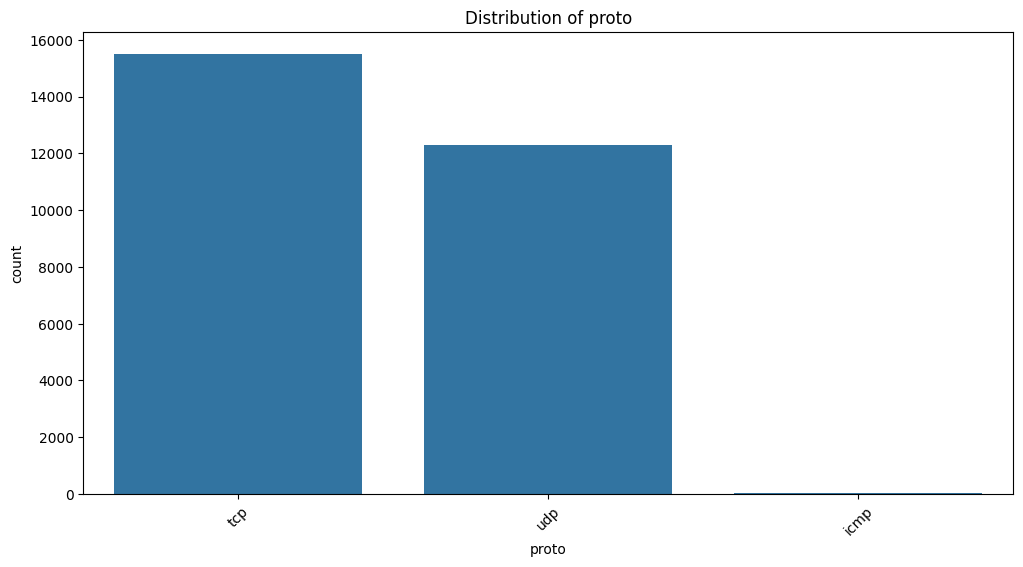

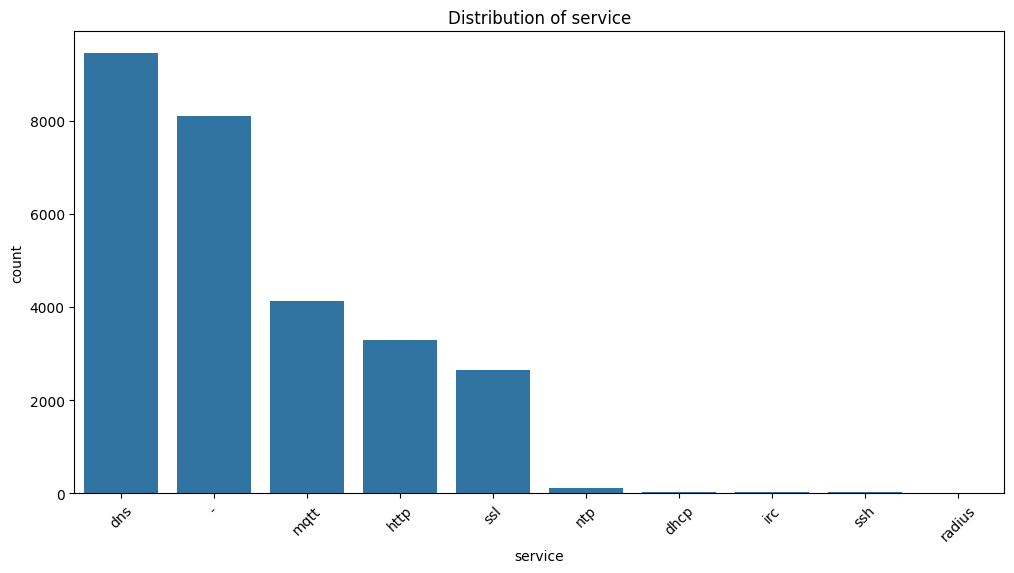

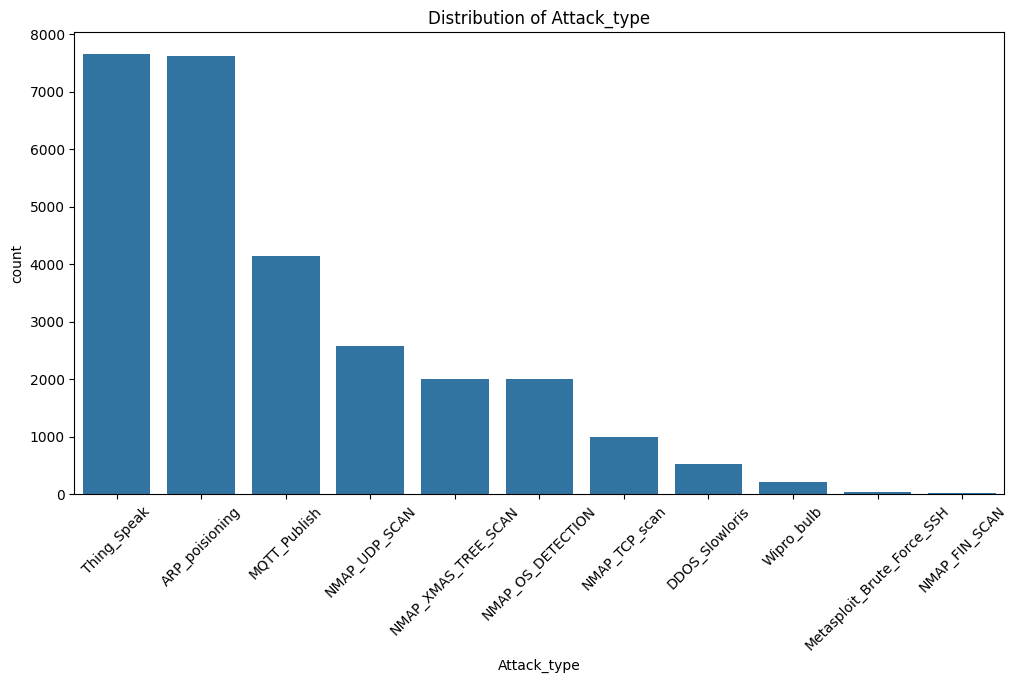

In [7]:
# Countplot for categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
for i in categorical_cols:
    plt.figure(figsize=(12,6))
    sns.countplot(x=df[i], data=df, order=df[i].value_counts().index)
    plt.title(f'Distribution of {i}')
    plt.xticks(rotation=45)
    plt.show()

In [8]:
# check for unique values for all columns
for col in df.columns:
    print(f'Unique values in {col}: {df[col].nunique()}')

# drop bwd_URG_flag_count due to single unique value
df.drop(columns=['bwd_URG_flag_count', 'fwd_URG_flag_count'], inplace=True)

Unique values in id.orig_p: 15230
Unique values in id.resp_p: 1809
Unique values in proto: 3
Unique values in service: 10
Unique values in flow_duration: 16380
Unique values in fwd_pkts_tot: 163
Unique values in bwd_pkts_tot: 172
Unique values in fwd_data_pkts_tot: 116
Unique values in bwd_data_pkts_tot: 154
Unique values in fwd_pkts_per_sec: 15886
Unique values in bwd_pkts_per_sec: 15423
Unique values in flow_pkts_per_sec: 16106
Unique values in down_up_ratio: 468
Unique values in fwd_header_size_tot: 353
Unique values in fwd_header_size_min: 7
Unique values in fwd_header_size_max: 8
Unique values in bwd_header_size_tot: 352
Unique values in bwd_header_size_min: 7
Unique values in bwd_header_size_max: 9
Unique values in flow_FIN_flag_count: 11
Unique values in flow_SYN_flag_count: 8
Unique values in flow_RST_flag_count: 9
Unique values in fwd_PSH_flag_count: 70
Unique values in bwd_PSH_flag_count: 98
Unique values in flow_ACK_flag_count: 210
Unique values in fwd_URG_flag_count: 2
Uniq

In [9]:
# values of service column
print(df['service'].value_counts())

service
dns       9444
-         8110
mqtt      4132
http      3289
ssl       2656
ntp        115
dhcp        29
irc         28
ssh         28
radius       2
Name: count, dtype: int64


In [10]:
# chi-square test for categorical feature 'service'
contingency_table = pd.crosstab(df['service'], df['Attack_type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square test p-value for service: {p}')
# since p < 0.05, we reject the null hypothesis and keep the feature
# then # drop records with service value '-'
df = df[df['service'] != '-']
print(df.shape)

Chi-square test p-value for service: 0.0
(19723, 82)


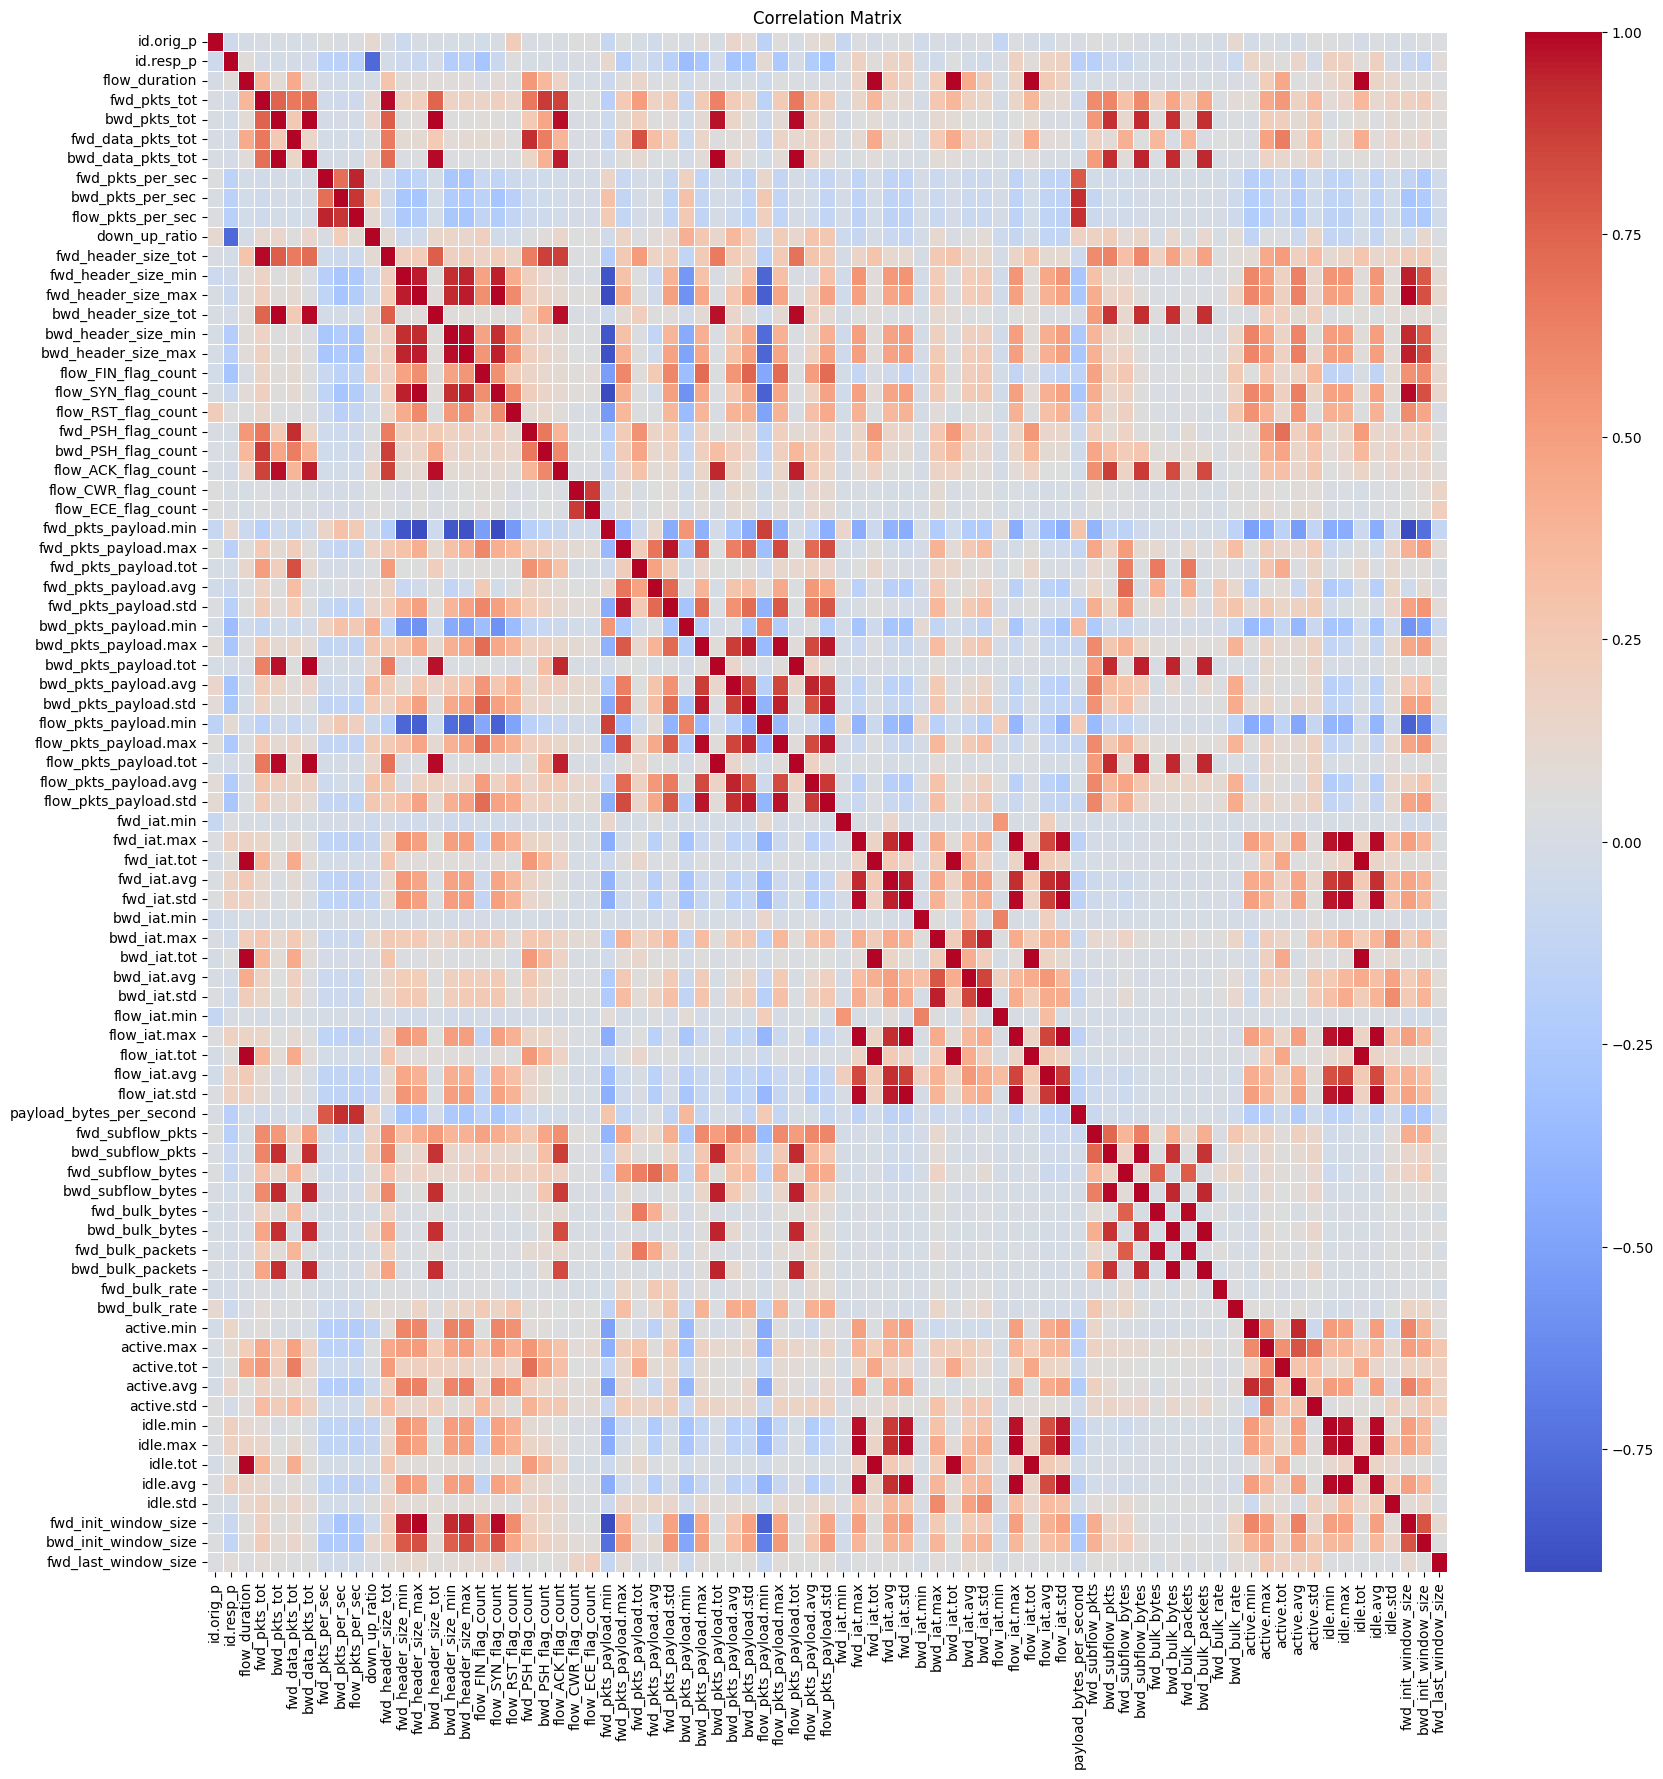

Columns to drop due to high correlation: ['bwd_data_pkts_tot', 'flow_pkts_per_sec', 'fwd_header_size_tot', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max', 'flow_SYN_flag_count', 'fwd_PSH_flag_count', 'flow_ACK_flag_count', 'fwd_pkts_payload.min', 'fwd_pkts_payload.std', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.std', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.tot', 'bwd_iat.std', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std', 'payload_bytes_per_second', 'bwd_subflow_pkts', 'bwd_subflow_bytes', 'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets', 'active.avg', 'idle.min', 'idle.max', 'idle.tot', 'idle.avg', 'fwd_init_window_size']


In [11]:
# correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(20,20))
corr = numerical_df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Detect highly correlated features with threshold of 0.9 and drop one of each pair
th = 0.9
corr_matrix = numerical_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > th)]
print(f'Columns to drop due to high correlation: {to_drop}')

(19723, 43)


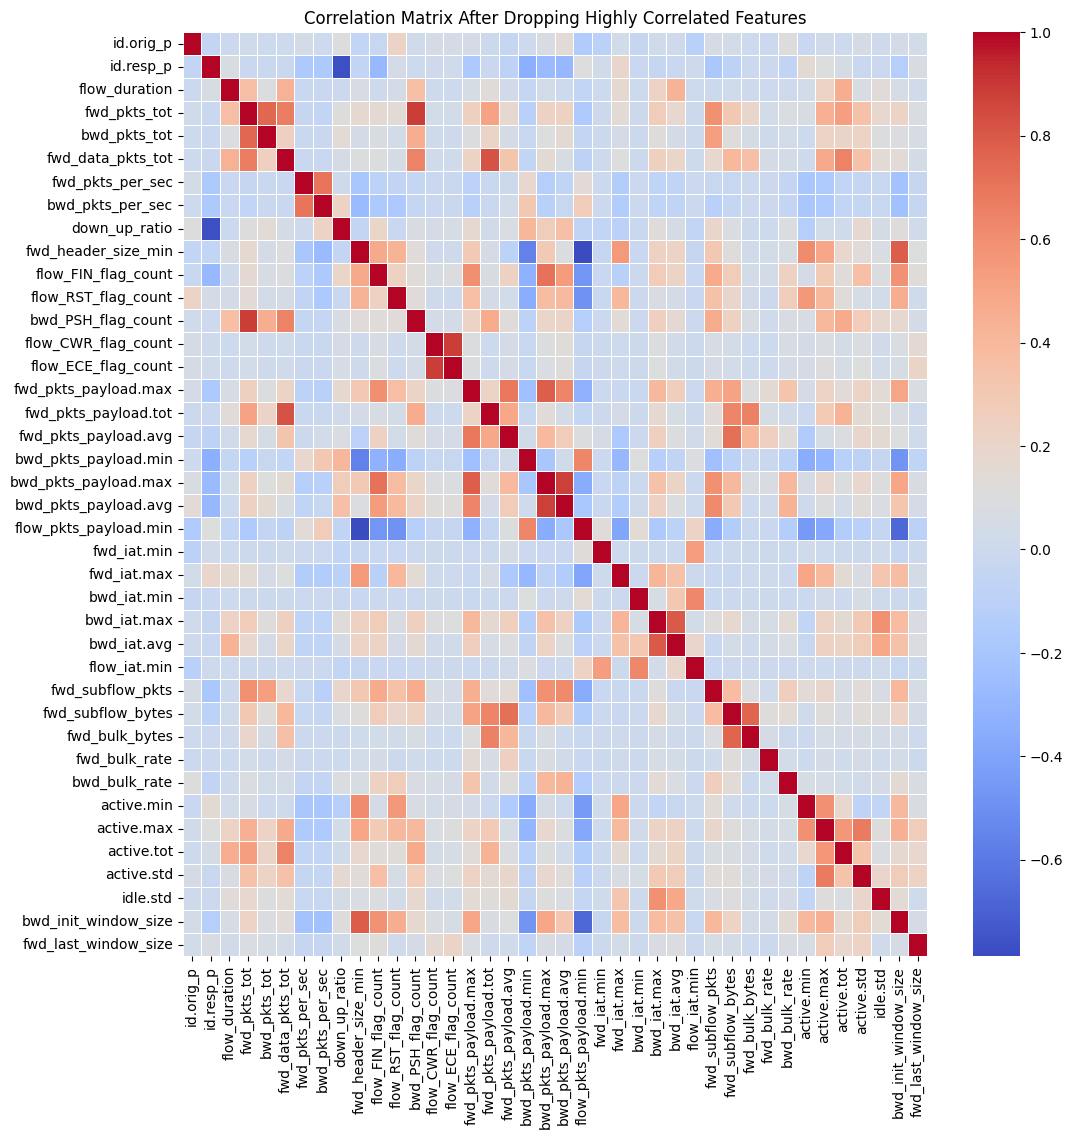

In [12]:
# Dimension reduction
# drop highly correlated features (threshold = 0.9)
df.drop(columns=to_drop, inplace=True)
# check new shape after dropping
print(df.shape)
# check correlation matrix again
plt.figure(figsize=(12,12))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix After Dropping Highly Correlated Features')
plt.show()

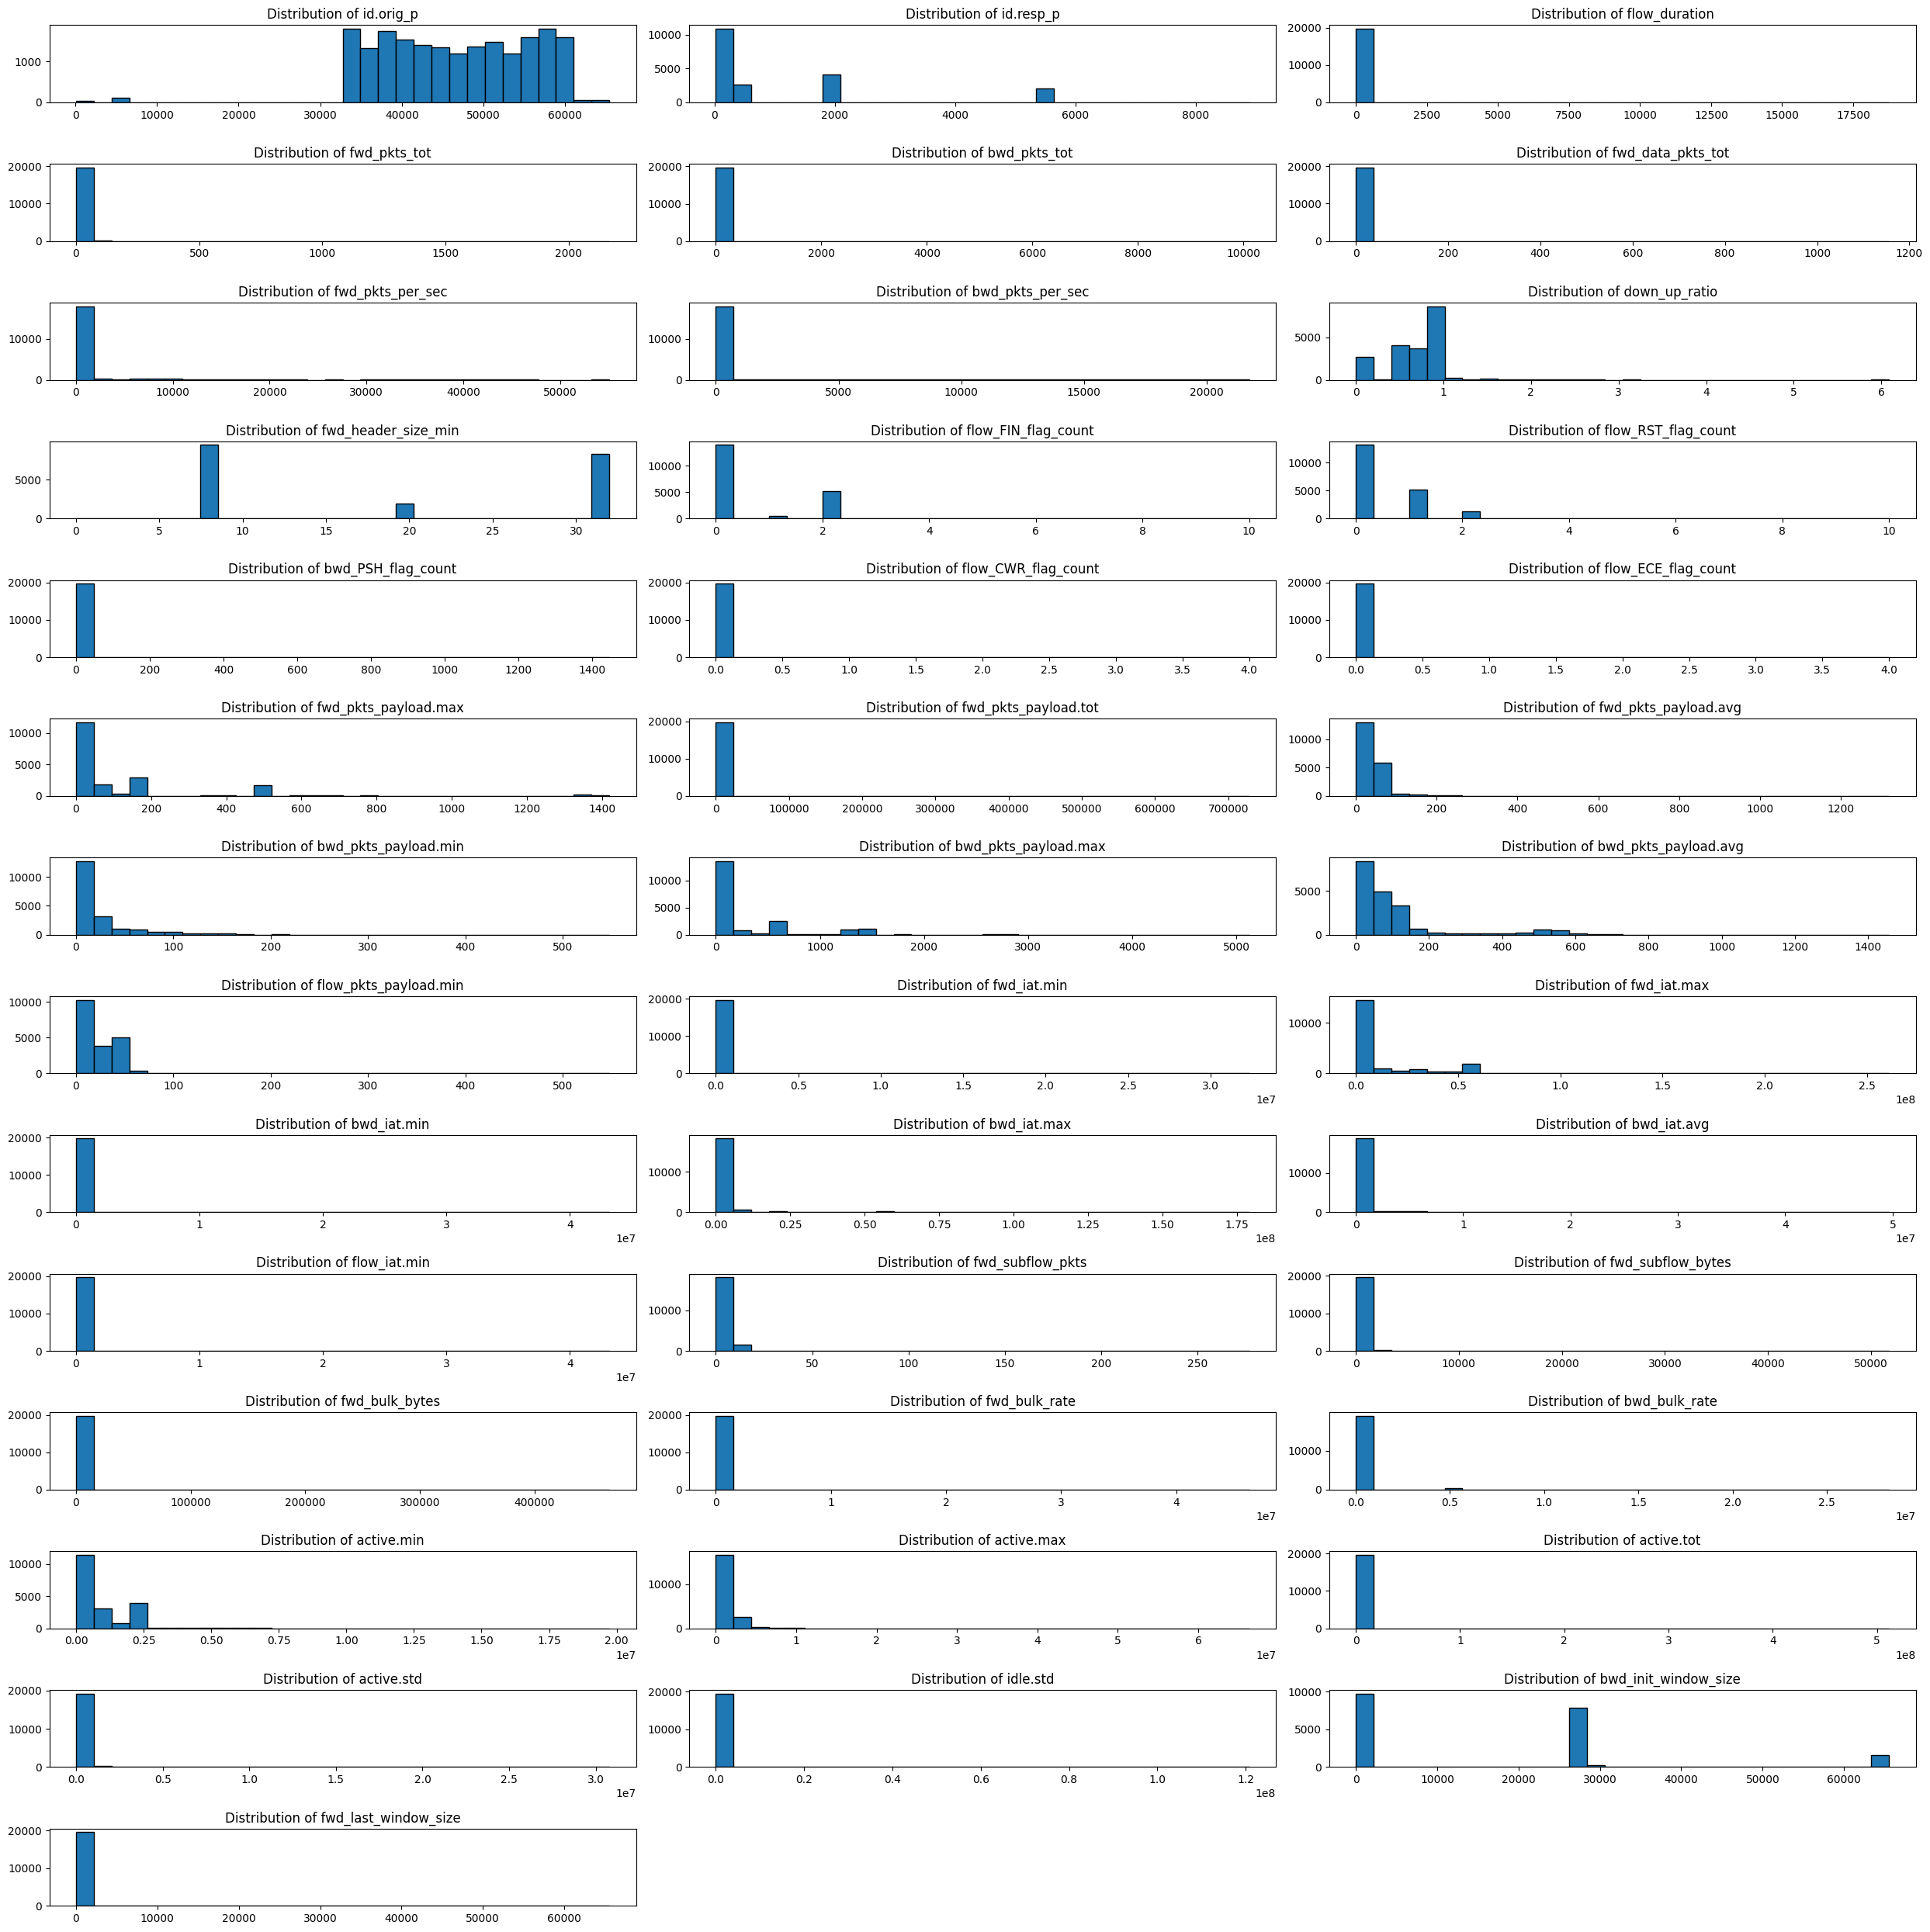

In [13]:
# Histograms for numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns
f = plt.figure(figsize=(25, 25))
for i,col in enumerate(numerical_cols):
    ax = f.add_subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    plt.hist(df[col], bins=30, edgecolor='k')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

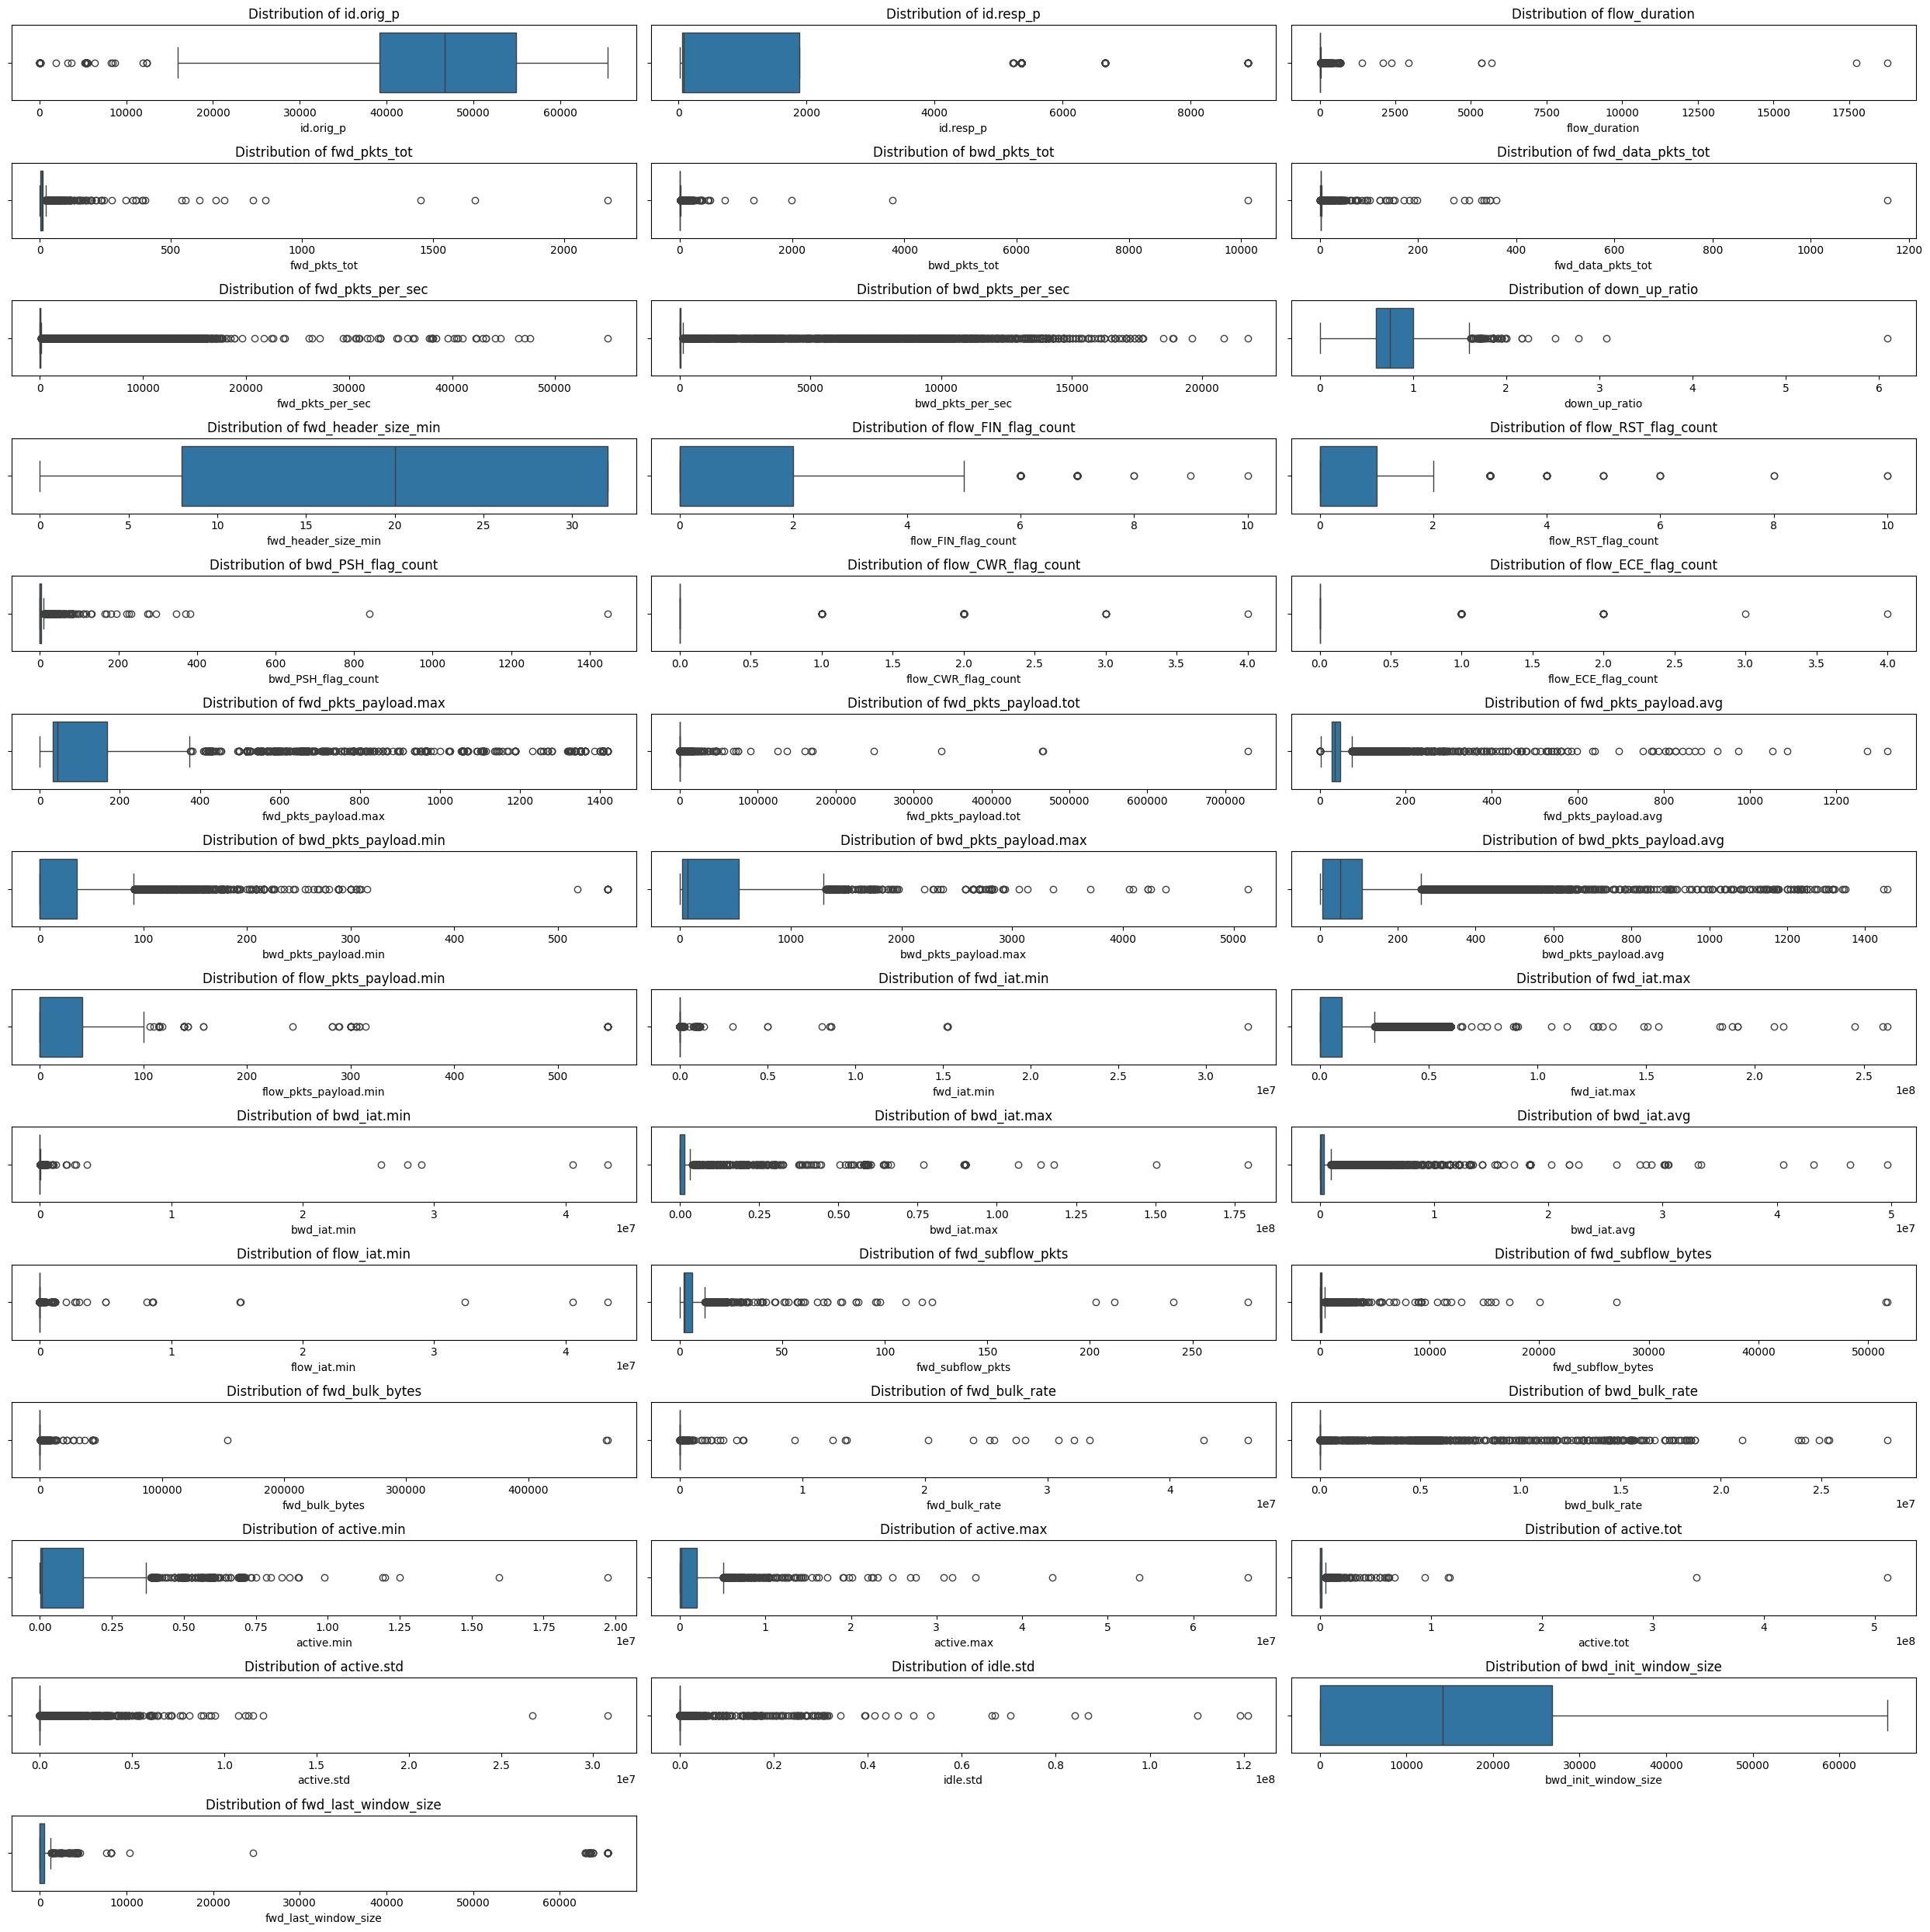

In [14]:
# Boxplots for numerical features
f = plt.figure(figsize=(25, 25))
for i,col in enumerate(numerical_cols):
    ax = f.add_subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.boxplot(orientation='h', x=df[col])
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()

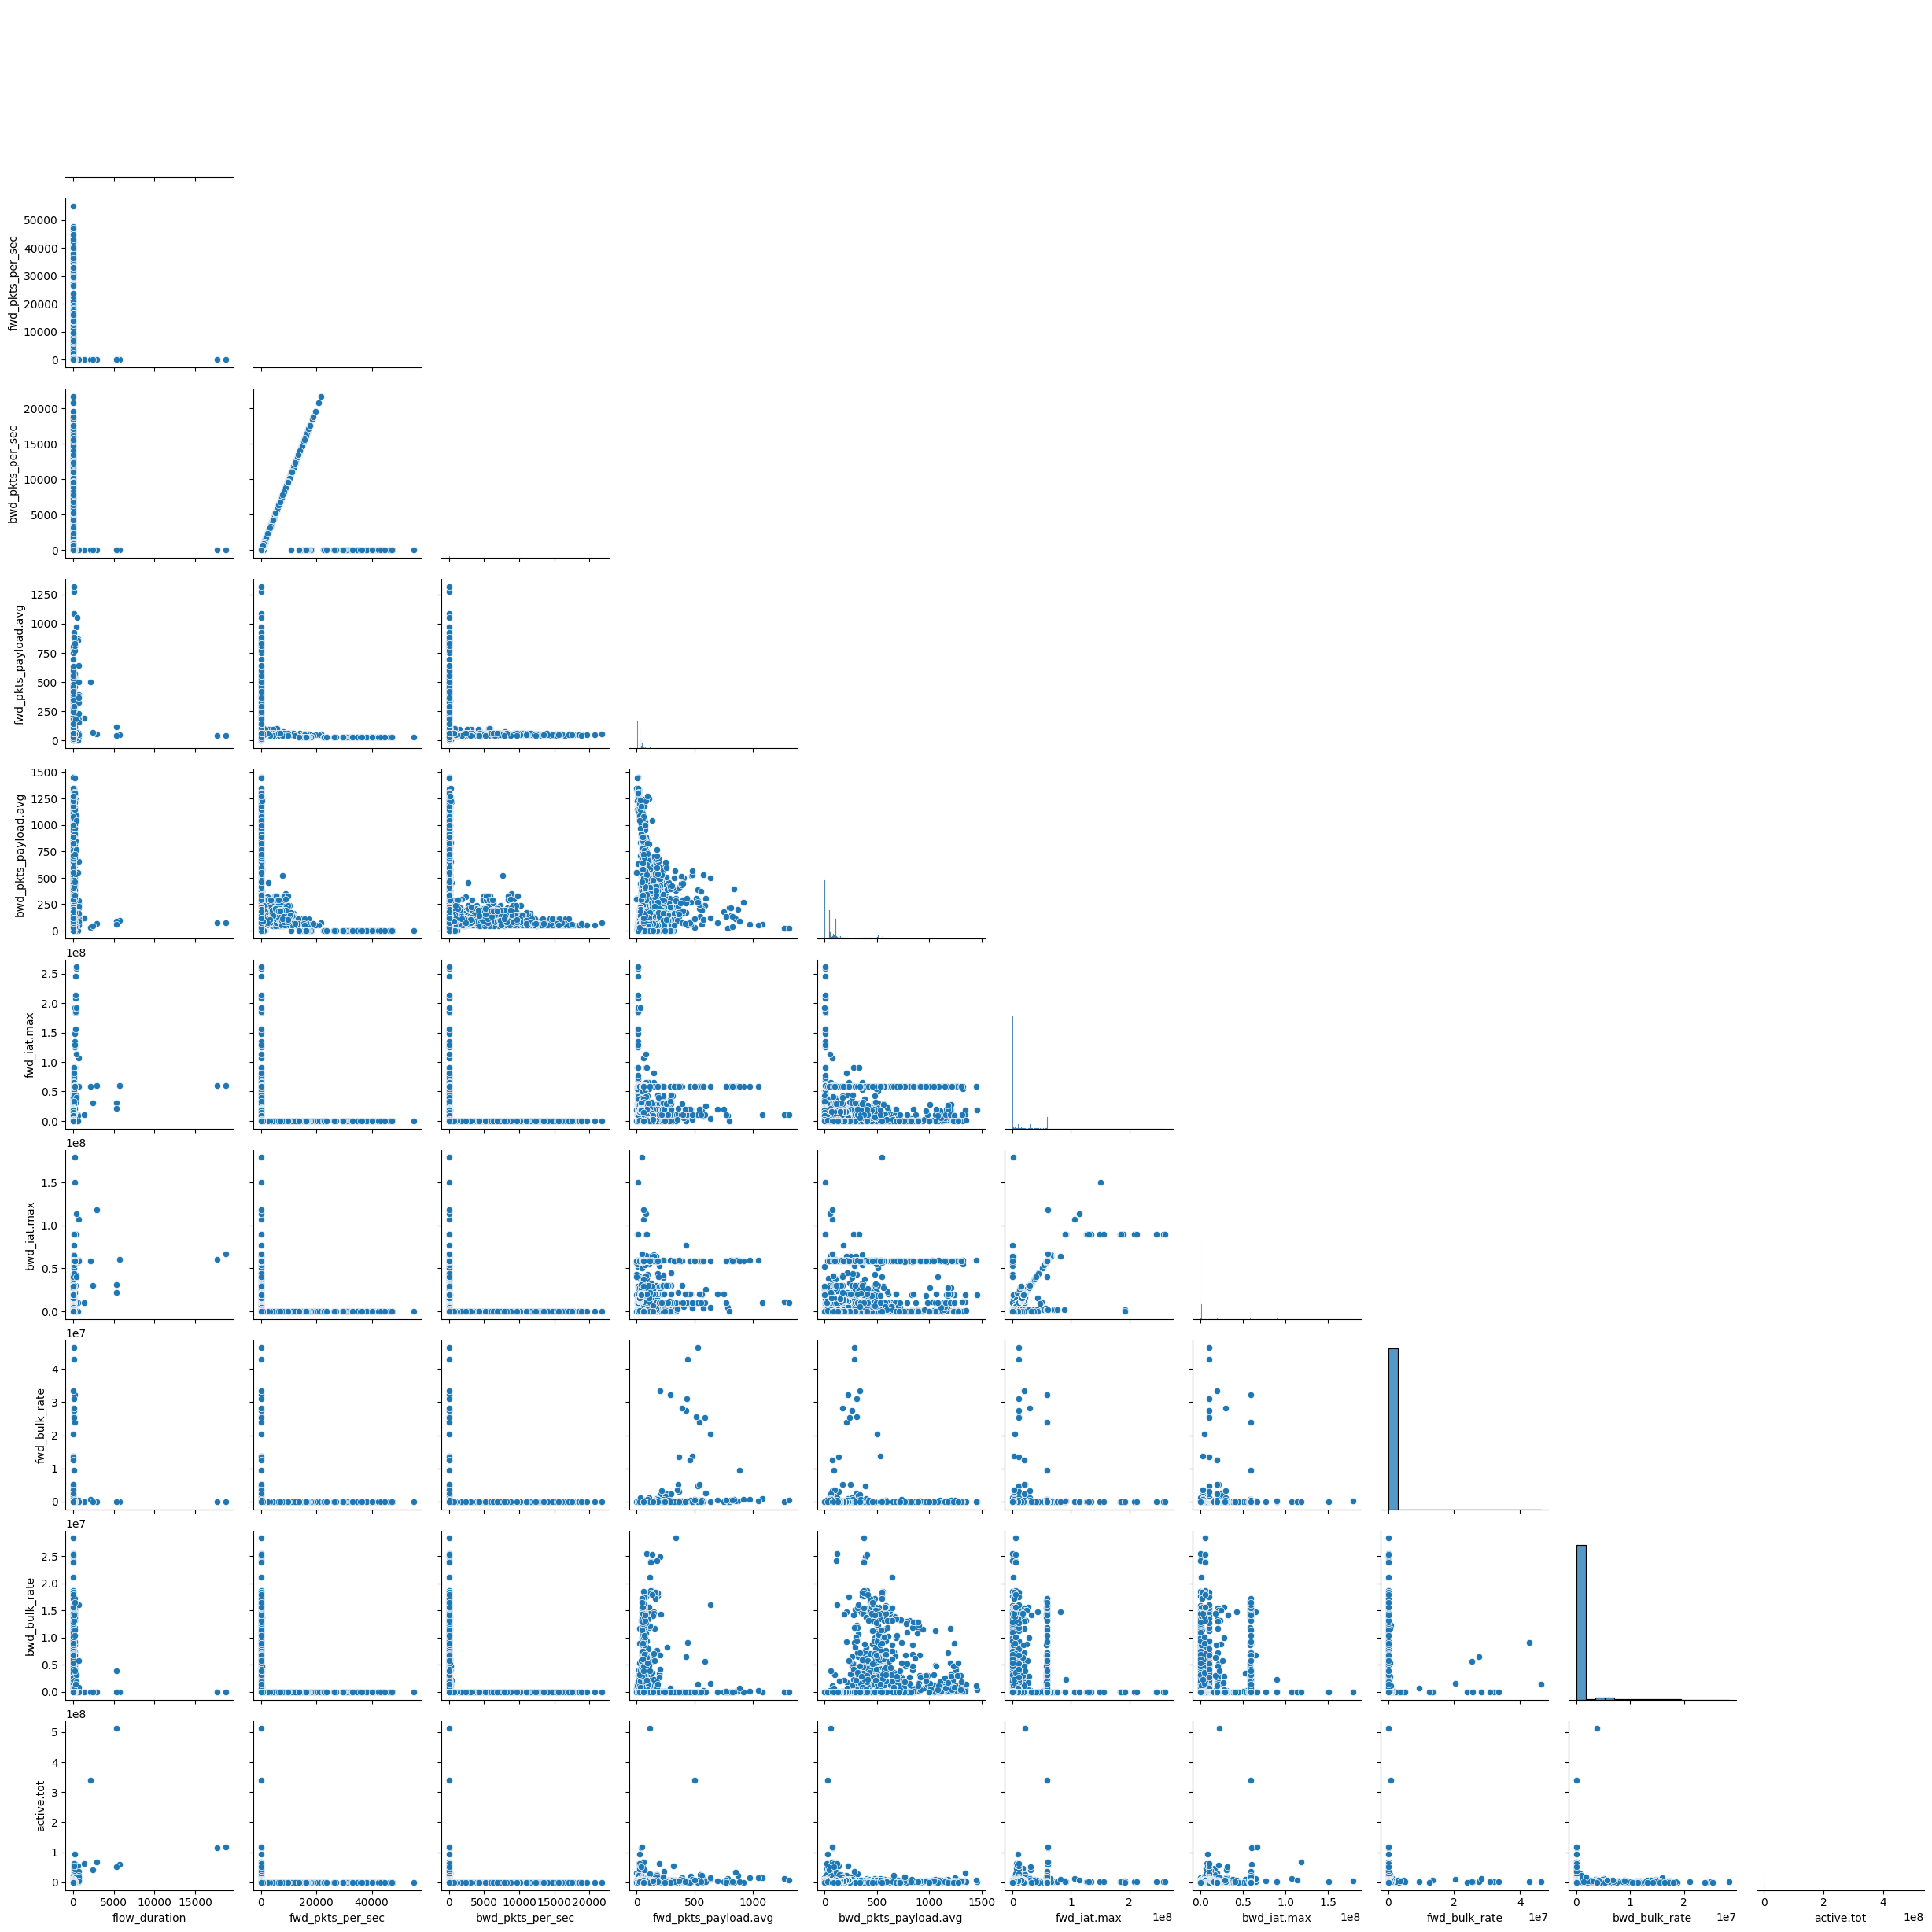

In [25]:
# Pairplot or scatterplot 
# Due to large number of features, we will plot a sample of 5 numerical features
numerical_cols.tolist()
sampled_cols = ['flow_duration', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'fwd_pkts_payload.avg', 'bwd_pkts_payload.avg', 'fwd_iat.max', 'bwd_iat.max', 'fwd_bulk_rate', 'bwd_bulk_rate', 'active.tot']
# Use scatter plots instead of KDE to avoid errors
sns.pairplot(df[sampled_cols + ['Attack_type']], corner=True)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19723 entries, 0 to 26451
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id.orig_p              19723 non-null  int64  
 1   id.resp_p              19723 non-null  int64  
 2   proto                  19723 non-null  object 
 3   service                19723 non-null  object 
 4   flow_duration          19723 non-null  float64
 5   fwd_pkts_tot           19723 non-null  int64  
 6   bwd_pkts_tot           19723 non-null  int64  
 7   fwd_data_pkts_tot      19723 non-null  int64  
 8   fwd_pkts_per_sec       19723 non-null  float64
 9   bwd_pkts_per_sec       19723 non-null  float64
 10  down_up_ratio          19723 non-null  float64
 11  fwd_header_size_min    19723 non-null  int64  
 12  flow_FIN_flag_count    19723 non-null  int64  
 13  flow_RST_flag_count    19723 non-null  int64  
 14  bwd_PSH_flag_count     19723 non-null  int64  
 15  flow_CW

# Part 3: Implementing Classification Algorithms

In [17]:
# Encoding categorical variables and preparing data for modeling
# Seperate features and target variable
X = df.drop(columns=['Attack_type'])
y = df['Attack_type']

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)
X = X.astype(np.float32)
print(X.shape)
X.head()

(19723, 49)


,id.orig_p,id.resp_p,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,down_up_ratio,fwd_header_size_min,...,fwd_last_window_size,proto_udp,service_dns,service_http,service_irc,service_mqtt,service_ntp,service_radius,service_ssh,service_ssl
0,38667.0,1883.0,32.011597,9.0,5.0,3.0,0.281148,0.156193,0.555556,32.0,...,502.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,51143.0,1883.0,31.883583,9.0,5.0,3.0,0.282277,0.156821,0.555556,32.0,...,502.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,44761.0,1883.0,32.124054,9.0,5.0,3.0,0.280164,0.155647,0.555556,32.0,...,502.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,60893.0,1883.0,31.961063,9.0,5.0,3.0,0.281593,0.156440,0.555556,32.0,...,502.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,51087.0,1883.0,31.902363,9.0,5.0,3.0,0.282111,0.156728,0.555556,32.0,...,502.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [28]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Z-score normalization due to keeping outliers and wide range of values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1418
           1       1.00      1.00      1.00       104
           2       1.00      1.00      1.00       815
           3       1.00      0.75      0.86         4
           4       0.00      0.00      0.00         2
           5       0.93      0.84      0.88        31
           6       0.00      0.00      0.00         1
           7       0.99      0.99      0.99      1521
           8       0.98      0.94      0.96        49

    accuracy                           0.99      3945
   macro avg       0.77      0.72      0.74      3945
weighted avg       0.99      0.99      0.99      3945



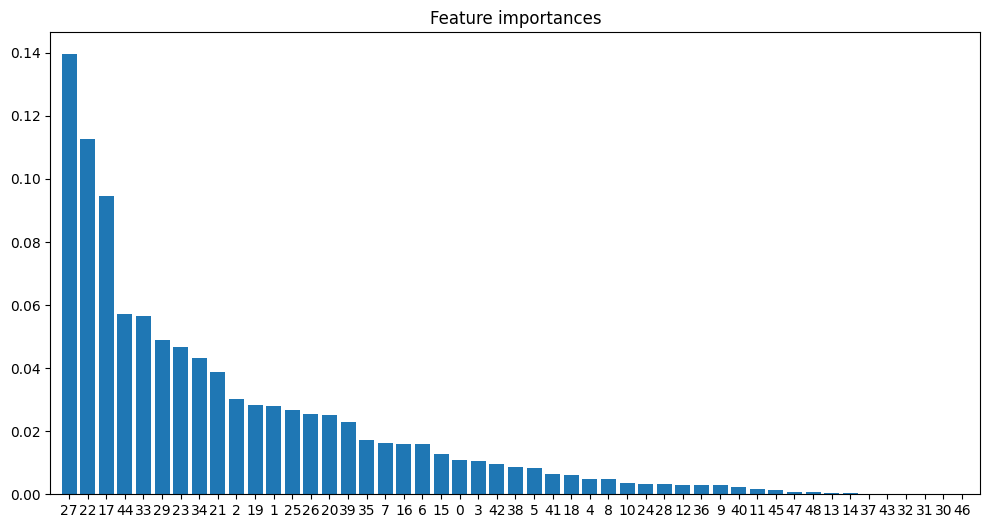

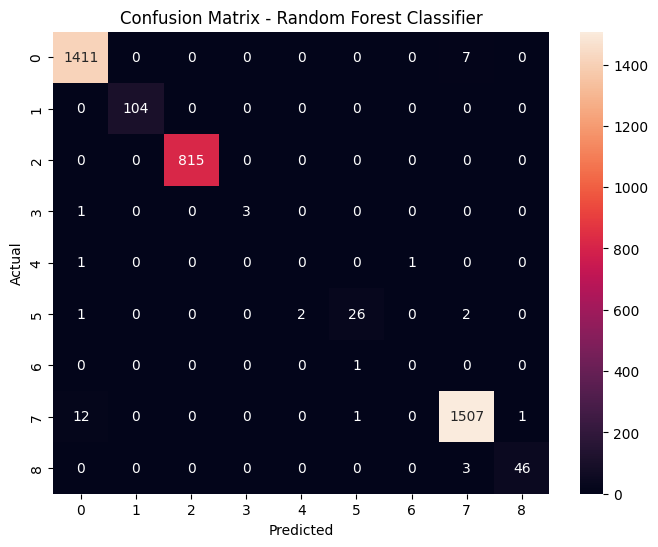

In [34]:
# Three Classification Models to be implemented: Random Forest Classifier, Logistic Regression, and Support Vector Machine (SVM)
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rfc))

# Feature importance from Random Forest
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

# Confusion Matrix for Random Forest
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(8,6))
sns.heatmap(cm_rfc, annot=True, fmt='d')
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()